> Texto fornecido sob a Creative Commons Attribution license, CC-BY. Todo o código está disponível sob a FSF-approved BSD-3 license.<br>
> (c) Original por Lorena A. Barba, Gilbert F. Forsyth em 2017, traduzido por Felipe N. Schuch em 2020.<br>
> [@LorenaABarba](https://twitter.com/LorenaABarba) - [@fschuch](https://twitter.com/fschuch)

12 passos para Navier-Stokes
======
***

Você chegou até aqui? Este é o último passo! Quanto tempo você levou para escrever a sua própria solucão para Navier – Stokes em Python seguindo este módulo interativo? Conte para nós!

Passo 12: Escoamento em Canal com Navier–Stokes
----
***

A única diferença entre esta etapa final e a Etapa 11 é que vamos adicionar um termo de fonte à equação de momento na direção $u$, para imitar o efeito de um escoamento em canal acionado por pressão. Aqui estão nossas equações de Navier–Stokes modificadas:

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu\left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}\right)+F$$

$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)$$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2}=-\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y}\right)
$$

### Equações discretas

Com paciência e cuidado, escrevemos a forma discreta das equações. É altamente recomendável que você as escreva com suas próprias mãos, seguindo mentalmente cada termo enquanto o escreve.

Equação do momento para $u$:

$$
\begin{split}
& \frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x} \\
& \qquad +\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)+F_{i,j}
\end{split}
$$

Equação do momento para $v$:

$$
\begin{split}
& \frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y} \\
& \qquad +\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}
$$

E a equação da pressão:

$$
\begin{split}
& \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2} + \frac{p_{i,j+1}^{n}-2p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} = \\
& \qquad \rho\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) - \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

Como sempre, temos que reorganizar essas equações da forma que precisamos no código para proceder com as iterações.

Para as equações de momento nas direções de $u$ e $v$, isolamos a velocidade no passo de tempo `n + 1`:

$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(u_{i,j}^{n}-u_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(u_{i,j}^{n}-u_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta x} \left(p_{i+1,j}^{n}-p_{i-1,j}^{n}\right) \\
& + \nu\left[\frac{\Delta t}{\Delta x^2} \left(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}\right)\right] \\
& + \Delta t F
\end{split}
$$

$$
\begin{split}
v_{i,j}^{n+1} = v_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(v_{i,j}^{n}-v_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(v_{i,j}^{n}-v_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta y} \left(p_{i,j+1}^{n}-p_{i,j-1}^{n}\right) \\
& + \nu\left[\frac{\Delta t}{\Delta x^2} \left(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}\right)\right]
\end{split}
$$

E para a equação da pressão, isolamos o termo $p_{i, j}^n $ para iterar no pseudo-tempo:

$$
\begin{split}
p_{i,j}^{n} = & \frac{\left(p_{i+1,j}^{n}+p_{i-1,j}^{n}\right) \Delta y^2 + \left(p_{i,j+1}^{n}+p_{i,j-1}^{n}\right) \Delta x^2}{2(\Delta x^2+\Delta y^2)} \\
& -\frac{\rho\Delta x^2\Delta y^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& \times \left[\frac{1}{\Delta t} \left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} + \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) - \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

A condição inicial é $u, v, p = 0 $ em todos os lugares, e as condições de contorno são:

$u, v, p$ são periódicos em $x=0$ e $x=2$

$u, v =0$ em $y=0$ e $y=2$

$\frac{\partial p}{\partial y}=0$ em $y=0$ e $y=2$

$F=1$ em todo o domínio.

Vamos começar importando nossa série usual de bibliotecas:


In [1]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Na etapa 11, isolamos uma parte de nossa equação discreta para facilitar a análise e vamos fazer a mesma coisa aqui. Uma coisa a notar é que temos condições de contorno periódicas em $x$, portanto, precisamos calcular explicitamente os valores na extremidade inicial e final do nosso vetor `u`.

In [2]:
def build_up_b(rho, dt, dx, dy, u, v):
    b = numpy.zeros_like(u)
    b[1:-1, 1:-1] = (rho * (1 / dt * ((u[2:,1:-1] - u[0:-2,1:-1]) / (2 * dx) +
                                      (v[1:-1,2:] - v[1:-1,0:-2]) / (2 * dy)) -
                            ((u[2:,1:-1] - u[0:-2,1:-1]) / (2 * dx))**2 -
                            2 * ((u[1:-1,2:] - u[1:-1,0:-2]) / (2 * dy) *
                                 (v[2:,1:-1] - v[0:-2,1:-1]) / (2 * dx))-
                            ((v[1:-1,2:] - v[1:-1,0:-2]) / (2 * dy))**2))
    
    # CC pressão periódica @ x = 2
    b[-1,1:-1] = (rho * (1 / dt * ((u[0,1:-1] - u[-2,1:-1]) / (2 * dx) +
                                    (v[-1,2:] - v[-1,0:-2]) / (2 * dy)) -
                          ((u[0,1:-1] - u[-2,1:-1]) / (2 * dx))**2 -
                          2 * ((u[-1,2:] - u[-1,0:-2]) / (2 * dy) *
                               (v[0,1:-1] - v[-2,1:-1]) / (2 * dx)) -
                          ((v[-1,2:] - v[-1,0:-2]) / (2 * dy))**2))

    # CC pressão periódica @ x = 0
    b[0,1:-1] = (rho * (1 / dt * ((u[1,1:-1] - u[-1,1:-1]) / (2 * dx) +
                                   (v[0,2:] - v[0,0:-2]) / (2 * dy)) -
                         ((u[1,1:-1] - u[-1,1:-1]) / (2 * dx))**2 -
                         2 * ((u[0,2:] - u[0,0:-2]) / (2 * dy) *
                              (v[1,1:-1] - v[-1,1:-1]) / (2 * dx))-
                         ((v[0,2:] - v[0,0:-2]) / (2 * dy))**2))
    
    return b

Também definiremos uma função iterativa de Poisson para a pressão, novamente como fizemos na Etapa 11. Mais uma vez, observe que precisamos incluir as condições de contorno periódicas na borda inicial e final. Também temos que especificar as condições de contorno na parte superior e inferior da nossa malha.

In [3]:
def pressure_poisson_periodic(p, dx, dy):
    pn = numpy.empty_like(p)
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[2:,1:-1] + pn[0:-2,1:-1]) * dy**2 +
                          (pn[1:-1,2:] + pn[1:-1,0:-2]) * dx**2) /
                         (2 * (dx**2 + dy**2)) -
                         dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, 1:-1])

        # CC pressão periódica @ x = 2
        p[-1,1:-1] = (((pn[0,1:-1] + pn[-2,1:-1])* dy**2 +
                        (pn[-1,2:] + pn[-1,0:-2]) * dx**2) /
                       (2 * (dx**2 + dy**2)) -
                       dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[-1,1:-1])

        # CC pressão periódica @ x = 0
        p[0,1:-1] = (((pn[1,1:-1] + pn[-1,1:-1])* dy**2 +
                       (pn[0,2:] + pn[0,0:-2]) * dx**2) /
                      (2 * (dx**2 + dy**2)) -
                      dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[0,1:-1])
        
        # Condição de contorno para pressure na parede
        p[:,-1] =p[:,-2]  # dp/dy = 0 at y = 2
        p[:,0] = p[:,1]  # dp/dy = 0 at y = 0
    
    return p

Agora, temos nossa lista familiar de variáveis e condições iniciais a declarar antes de começar.

In [4]:
#Declaração das variáveis
x  = numpy.linspace(0, 2, num=41)
y  = numpy.linspace(0, 2, num=41)
nt = 10
nit = 50 
c = 1

##Veriáveis físicas
rho = 1
nu = .1
F = 1
dt = .01

#Parâmetros da malha
nx = x.size
ny = y.size
dx = (x[-1] - x[0]) / (nx - 1)
dy = (y[-1] - y[0]) / (ny - 1)

X, Y = numpy.meshgrid(x, y)

#Condições Iniciais
u = numpy.zeros((nx, ny))
un = numpy.zeros((nx, ny))

v = numpy.zeros((nx, ny))
vn = numpy.zeros((nx, ny))

p = numpy.ones((nx, ny))
pn = numpy.ones((nx, ny))

b = numpy.zeros((nx, ny))

Para a cerne do nosso cálculo, vamos voltar a um truque que usamos no Passo 9 para a Equação de Laplace. Estamos interessados em como será nosso domínio quando chegarmos a um estado quase estável. Podemos especificar um número de intervalos de tempo `nt` e incrementá-lo até ficarmos satisfeitos com os resultados, ou podemos dizer ao nosso código para executar até que a diferença entre duas iterações consecutivas seja muito pequena.

Também temos que gerenciar **8** condições de contorno separadas para cada iteração. O código abaixo grava cada um deles explicitamente. Se você estiver interessado em um desafio, tente escrever uma função que possa lidar com algumas ou todas essas condições de contorno. Se você estiver interessado em resolver isso, provavelmente deve ler os [dicionários](http://docs.python.org/2/tutorial/datastructures.html#dictionaries) em Python.

In [5]:
udiff = 1
stepcount = 0

while udiff > .001:
    un = u.copy()
    vn = v.copy()

    b = build_up_b(rho, dt, dx, dy, u, v)
    p = pressure_poisson_periodic(p, dx, dy)

    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx * 
                    (un[1:-1, 1:-1] - un[0:-2,1:-1]) -
                     vn[1:-1, 1:-1] * dt / dy * 
                    (un[1:-1, 1:-1] - un[1:-1,0:-2]) -
                     dt / (2 * rho * dx) * 
                    (p[2:,1:-1] - p[0:-2,1:-1]) +
                     nu * (dt / dx**2 * 
                    (un[2:,1:-1] - 2 * un[1:-1,1:-1] + un[0:-2,1:-1]) +
                     dt / dy**2 * 
                    (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1,0:-2])) + 
                     F * dt)

    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx * 
                    (vn[1:-1, 1:-1] - vn[0:-2,1:-1]) -
                     vn[1:-1, 1:-1] * dt / dy * 
                    (vn[1:-1, 1:-1] - vn[1:-1,0:-2]) -
                     dt / (2 * rho * dy) * 
                    (p[1:-1,2:] - p[1:-1,0:-2]) +
                     nu * (dt / dx**2 *
                    (vn[2:,1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2,1:-1]) +
                     dt / dy**2 * 
                    (vn[1:-1,2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1,0:-2])))

    # CC periódica para u @ x = 2     
    u[-1,1:-1] = (un[-1,1:-1] - un[-1,1:-1] * dt / dx * 
                  (un[-1,1:-1] - un[-2,1:-1]) -
                   vn[-1,1:-1] * dt / dy * 
                  (un[-1,1:-1] - un[-1,0:-2]) -
                   dt / (2 * rho * dx) *
                  (p[0,1:-1] - p[-2,1:-1]) + 
                   nu * (dt / dx**2 * 
                  (un[0,1:-1] - 2 * un[-1,1:-1] + un[-2,1:-1]) +
                   dt / dy**2 * 
                  (un[-1,2:] - 2 * un[-1,1:-1] + un[-1,0:-2])) + F * dt)

    # CC periódica para u @ x = 0
    u[0,1:-1] = (un[0,1:-1] - un[0,1:-1] * dt / dx *
                 (un[0,1:-1] - un[-1,1:-1]) -
                  vn[0,1:-1] * dt / dy * 
                 (un[0,1:-1] - un[0,0:-2]) - 
                  dt / (2 * rho * dx) * 
                 (p[1,1:-1] - p[-1,1:-1]) + 
                  nu * (dt / dx**2 * 
                 (un[1,1:-1] - 2 * un[0,1:-1] + un[-1,1:-1]) +
                  dt / dy**2 *
                 (un[0,2:] - 2 * un[0,1:-1] + un[0,0:-2])) + F * dt)

    # CC periódica para v @ x = 2
    v[-1,1:-1] = (vn[-1,1:-1] - un[-1,1:-1] * dt / dx *
                  (vn[-1,1:-1] - vn[-2,1:-1]) - 
                   vn[-1,1:-1] * dt / dy *
                  (vn[-1,1:-1] - vn[-1,0:-2]) -
                   dt / (2 * rho * dy) * 
                  (p[-1,2:] - p[-1,0:-2]) +
                   nu * (dt / dx**2 *
                  (vn[0,1:-1] - 2 * vn[-1,1:-1] + vn[-2,1:-1]) +
                   dt / dy**2 *
                  (vn[-1,2:] - 2 * vn[-1,1:-1] + vn[-1,0:-2])))

    # CC periódica para v @ x = 0
    v[0,1:-1] = (vn[0,1:-1] - un[0,1:-1] * dt / dx *
                 (vn[0,1:-1] - vn[-1,1:-1]) -
                  vn[0,1:-1] * dt / dy *
                 (vn[0,1:-1] - vn[0,0:-2]) -
                  dt / (2 * rho * dy) * 
                 (p[0,2:] - p[0,0:-2]) +
                  nu * (dt / dx**2 * 
                 (vn[1,1:-1] - 2 * vn[0,1:-1] + vn[-1,1:-1]) +
                  dt / dy**2 * 
                 (vn[0,2:] - 2 * vn[0,1:-1] + vn[0,0:-2])))


    # Condição de contorno na parede: u,v = 0 @ y = 0,2
    u[:,0] = 0
    u[:,-1] = 0
    v[:,0] = 0
    v[:,-1]=0
    
    udiff = (numpy.sum(u) - numpy.sum(un)) / numpy.sum(u)
    stepcount += 1

Você pode ver que também incluímos uma variável `stepcount` para ver quantas iterações nosso laço passou antes de nossa condição de parada ser atendida. 

In [6]:
print(stepcount)

499


Se você quiser ver como o número de iterações aumenta à medida que nossa condição `udiff` se torna cada vez menor, tente definir uma função para executar o loop` while` escrito acima, que recebe uma entrada `udiff` e gera o número de iterações que o função é executada.

Por enquanto, vejamos nossos resultados. Usamos a função `quiver` para observar os resultados do escoamento em cavidade e ela também funciona bem para o escoamento em canal.

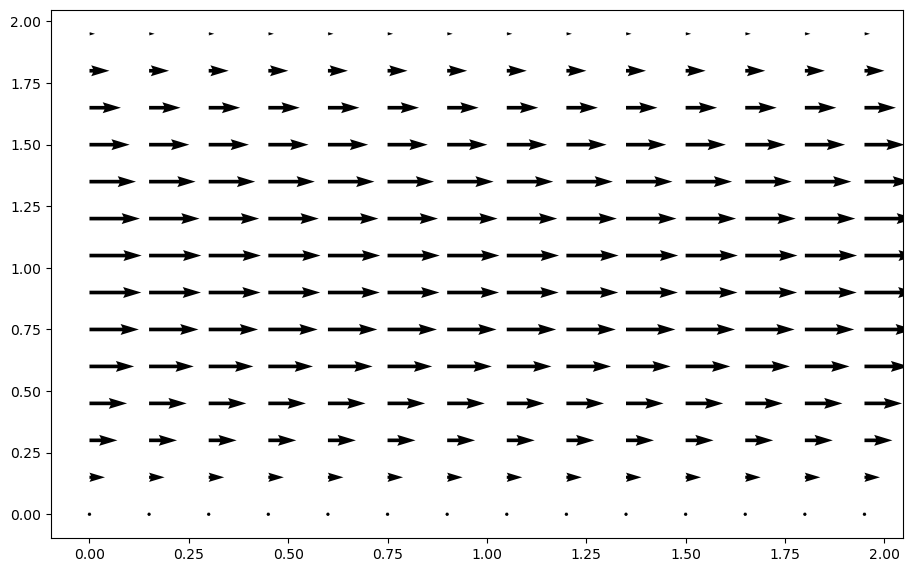

In [7]:
fig = pyplot.figure(figsize = (11,7), dpi=100)
pyplot.quiver(X[::3, ::3], Y[::3, ::3], u[::3, ::3].T, v[::3, ::3].T);

As estruturas no comando `quiver` que se parecem com `[::3,::3]` são úteis ao lidar com grandes quantidades de dados que você deseja visualizar. O que usadom acima diz ao `matplotlib` para plotar apenas cada terceiro dos ponto que temos. Se deixarmos de fora, você pode ver que os resultados podem parecer um pouco abarrotados. 

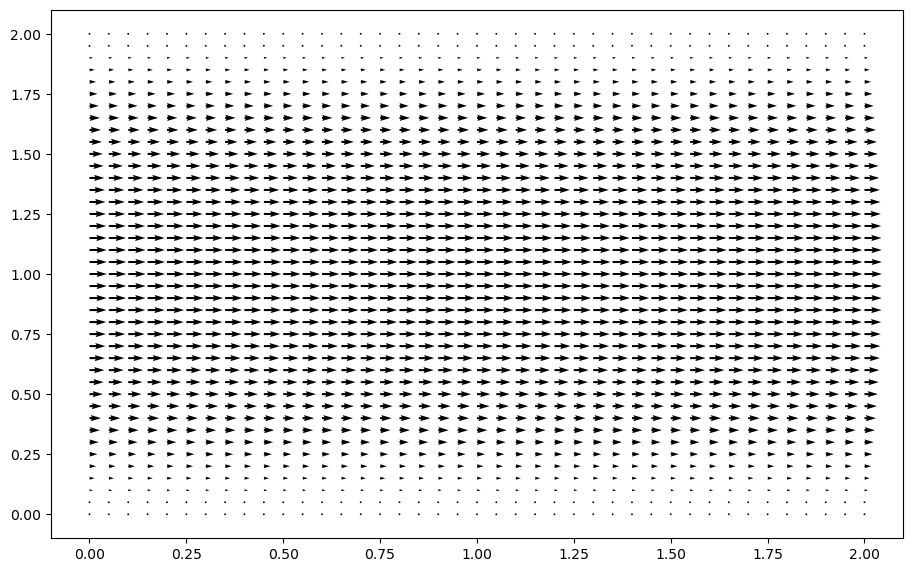

In [8]:
fig = pyplot.figure(figsize = (11,7), dpi=100)
pyplot.quiver(X, Y, u.T, v.T);

Material Complementar
-----
***

##### Mas qual é o significado do termo $F$?

O passo 12 é um exercício que demonstra o problema do escoamento em um canal ou tubo. Se você se lembra da sua aula de mecânica de fluidos, um gradiente de pressão especificado é o que impulsiona o escoamento de Poisseulle.

Lembre-se da equação do momento em $x$:

$$\frac{\partial u}{\partial t}+u \cdot \nabla u = -\frac{\partial p}{\partial x}+\nu \nabla^2 u$$

O que realmente fazemos no Passo 12 é dividir a pressão em componentes de média e flutuação $p = P + p'$. O gradiente de pressão médio aplicado é a constante $-\frac{\partial P}{\partial x}=F$ (interpretado como um termo fonte), e o componente de flutuação é $\frac{\partial p'}{\partial x}$. Portanto, a pressão que resolvemos na Etapa 12 é na verdade $p'$, que para um escoamento constante é de fato igual a zero em todo o domínio.

<b>Por que fizemos isso?</b>

Observe que usamos condições de contorno periódicas para esse escoamento. Para um escoamento com um gradiente de pressão constante, o valor da pressão na borda esquerda do domínio deve ser diferente da pressão na borda direita. Portanto, não podemos aplicar condições periódicas de contorno diretamente à pressão. É mais fácil fixar o gradiente e depois resolver as perturbações na pressão.

<b> Então não devemos sempre esperar um $p'$ uniforme/constante? </b>

Isso é verdade apenas no caso de escoamentos laminares constantes. Em números altos de Reynolds, os escoamentos em canais podem se tornar turbulentos e veremos flutuações instáveis na pressão, o que resultará em valores diferentes de zero para $p'$.

Na etapa 12, observe que o próprio campo de pressão não é constante, mas é o campo de perturbação da pressão. O campo de pressão varia linearmente ao longo do canal com inclinação igual ao gradiente de pressão. Além disso, para fluxos incompressíveis, o valor absoluto da pressão é inconseqüente.

##### E explore mais materiais on-line sobre CFD

O módulo interativo **12 Passos para Navier – Stokes** é um dos vários componentes da aula de Dinâmica dos Fluidos Computacional ministrada pela Prof. Lorena A. Barba na Universidade de Boston entre 2009 e 2013.

Para uma amostra de quais são os outros componentes desta disciplina, você pode explorar a seção **Resources** da versão da Primavera 2013 do [the course's Piazza site](https://piazza.com/bu/spring2013/me702/resources).

***

In [9]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> A célula acima executa o estilo para esse notebook. Nós modificamos o estilo encontrado no GitHub de [CamDavidsonPilon](https://github.com/CamDavidsonPilon), [@Cmrn_DP](https://twitter.com/cmrn_dp).